I have the clean data from the previous step that includes:

## X7
ds: in datetime format <br>
TMAX_7avg: 7 day average of max temperature <br>
TMIN_7avg: 7 day average of min temperature <br>
TOBS_7avg: 7-day average of observed temperature <br>
PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>
PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
y: 7-day snowfall total

## X14
ds: in datetime format <br>
TMAX_14avg: 14-day average of max temperature <br>
TMIN_14avg: 14-day average of min temperature <br>
TOBS_14avg: 14-day average of observed temperature <br>
PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>
PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
y: 14-day snowfall total

## X30
ds: in datetime format <br>
TMAX_30avg: 30-day average of max temperature <br>
TMIN_30avg: 30-day average of min temperature <br>
TOBS_30avg: 30-day average of observed temperature <br>
PDO: pacific decadal oscillation; data given by the month but interpolated to the day <br>
AMO: atlantic decadal oscillation; data measure by the month but interpolated to the day <br>
PRCP: water equivalent (in) or precipitation (if all the snow was melted down to water) <br>
y: 30-day snowfall total




In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import ppscore as pps
from fbprophet import Prophet
import featuretools as ft

In [2]:
import pickle
path="C:\Springboard\Github\Capstone1_alta\intermediate_data"
os.chdir(path)

In [3]:
X7 = pickle.load(open("X7_snow_pp.pkl", "rb"))
X7.head()

,ds,TMAX_7avg,TMIN_7avg,TOBS_7avg,PDO,AMO,y,PRCP,TMAX_7avg_sq,PRCP_30,PRCP_60,PRCP_90,PRCP_120,AMO_sq,PDO-sq
0,1944-11-21,36.736971,18.821202,26.551428,-0.48,0.272,0.0,0.00,1349.605015,3.881385,3.189846,3.302000,2.992308,0.073984,0.2304
1,1944-11-22,36.468501,18.626804,26.318706,-0.48,0.272,0.0,0.00,1329.951598,3.877463,3.177612,3.232985,3.105373,0.073984,0.2304
2,1944-11-23,35.907657,18.275119,25.773843,-0.48,0.272,0.0,0.00,1289.359862,3.866418,3.293433,3.154478,3.177313,0.073984,0.2304
3,1944-11-24,35.602554,17.895432,25.561157,-0.48,0.272,0.0,0.82,1267.541822,3.840299,3.352836,3.142090,3.154030,0.073984,0.2304
4,1944-11-25,35.568962,17.693867,25.509994,-0.48,0.272,0.0,0.06,1265.151044,3.826269,3.407313,3.130000,3.168060,0.073984,0.2304


In [4]:
X14 = pickle.load(open("X14_snow_pp.pkl", "rb"))
X14.head()

,ds,TMAX_14avg,TMIN_14avg,TOBS_14avg,PDO,AMO,y,PRCP,TMAX_14avg_sq,PRCP_30,PRCP_60,PRCP_90,PRCP_120,AMO_sq,PDO-sq
0,1944-11-21,37.718684,20.361125,27.755781,-0.48,0.272,0.0,0.00,1422.699103,3.881385,3.189846,3.302000,2.992308,0.073984,0.2304
1,1944-11-22,37.392477,20.000908,27.454610,-0.48,0.272,0.0,0.00,1398.197334,3.877463,3.177612,3.232985,3.105373,0.073984,0.2304
2,1944-11-23,37.002853,19.644660,27.049209,-0.48,0.272,0.0,0.00,1369.211094,3.866418,3.293433,3.154478,3.177313,0.073984,0.2304
3,1944-11-24,36.731221,19.266408,26.733002,-0.48,0.272,0.0,0.82,1349.182632,3.840299,3.352836,3.142090,3.154030,0.073984,0.2304
4,1944-11-25,36.614579,18.908971,26.446097,-0.48,0.272,0.0,0.06,1340.627360,3.826269,3.407313,3.130000,3.168060,0.073984,0.2304


In [5]:
X30 = pickle.load(open("X30_snow_pp.pkl", "rb"))
X30.head()

,ds,TMAX_30avg,TMIN_30avg,TOBS_30avg,PDO,AMO,y,PRCP,TMAX_30avg_sq,PRCP_30,PRCP_60,PRCP_90,PRCP_120,AMO_sq,PDO-sq
0,1944-11-21,40.749443,23.200133,30.960981,-0.48,0.272,0.0,0.00,1660.517109,3.881385,3.189846,3.302000,2.992308,0.073984,0.2304
1,1944-11-22,40.368661,22.847987,30.582609,-0.48,0.272,0.0,0.00,1629.628762,3.877463,3.177612,3.232985,3.105373,0.073984,0.2304
2,1944-11-23,39.926433,22.459288,30.114456,-0.48,0.272,0.0,0.00,1594.120056,3.866418,3.293433,3.154478,3.177313,0.073984,0.2304
3,1944-11-24,39.524067,22.042133,29.677999,-0.48,0.272,0.0,0.82,1562.151868,3.840299,3.352836,3.142090,3.154030,0.073984,0.2304
4,1944-11-25,39.166797,21.686802,29.277085,-0.48,0.272,0.0,0.06,1534.038021,3.826269,3.407313,3.130000,3.168060,0.073984,0.2304


I was going to run deep feature sythesis on this to create more possible features, but that doesn't seem to work. Instead I will just run FB Prophet and see if I can come back to this step after I finish with more time series modeling. 

## 1. FB Prophet modeling just on the time series - calculate error for 1 year
The first model that I build is just simple without any additional regressors. 

In [6]:
# slice off the last year of the X7 df to save to calculate error - may need to use boolean logic to extract these rows.
year = 2018
# split date between test and train data set
split_date = str(year) + '-11-14'
# end date of the test set
end_date = str(year+1) + '-04-15'
train = X7['ds'] <= split_date
X7_train = X7.loc[train]
# data set from the split until the end of data keeping
X7_long = X7.loc[~train]
# shorten this data for just the next winter
X7_test = X7_long[X7_long['ds'] <= end_date]

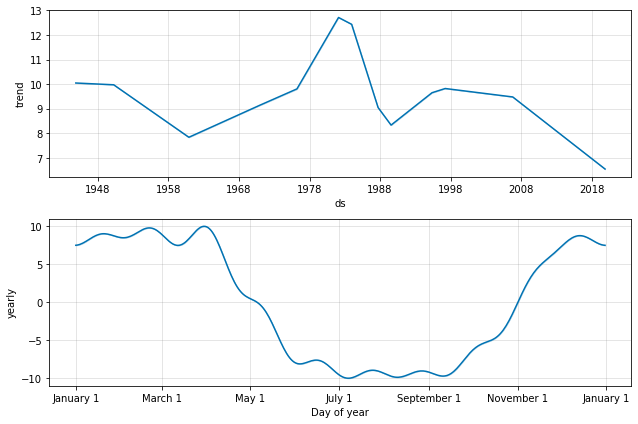

In [7]:
# let's take a better look at this with FB's Prophet - not considering any other regressors yet
from fbprophet import Prophet
m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
m_fb.fit(X7_train)
future = m_fb.make_future_dataframe(periods=365)
forecast = m_fb.predict(future)
m_fb.plot_components(forecast)
plt.savefig('Prophet_1.jpg')

In [8]:
compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]

In [9]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(X7_test['y'],compare['yhat'])
print(MSE)

208.8991323286658


In [10]:
np.sqrt(MSE) # for the whole winter November 15 to April 15

14.453343292424275

Considering that the mean snowfall for 7-day period in the winter is ~17in, that's a very large RMSE

### Ran this for these same 3 years (2016-2019) without using regressors <br>
Comparing RMSE for model vs. dummy <br>
2016-17: [[16.725252595117972, 16.27826291591095], <br>
2017-18: [10.466405773203524, 11.38487691487486], <br>
2018-19: [14.453343292424275, 14.031903165705913]] <br>
There is barely any difference between the dummy model (heuristic of snowfall has same chance all winter) and the model we built.

In [11]:
np.mean([16.725252595117972, 10.466405773203524, 14.453343292424275]), np.mean([16.27826291591095, 11.38487691487486, 14.031903165705913])

(13.881667220248593, 13.89834766549724)

## 2. FB Prophet time series plus regression for 3 winters of snowfall
I'll add regressors for Temperature, PDO, AMO. We'll look through the last 3 winters of snowfall data and compare

In [12]:
# let's try to add the regressors

# manual loop for calculating error year by year
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

RMSE_model = 0
RMSE_dum = 0
RMSE_diff = 0

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
    m_fb.add_regressor('TMAX_7avg')
    m_fb.add_regressor('TMIN_7avg')
    m_fb.add_regressor('TOBS_7avg')
    m_fb.add_regressor('PDO')
    m_fb.add_regressor('AMO')
    m_fb.fit(X7_train)
    # predicts for 1 year based on that model
    future = m_fb.make_future_dataframe(periods=365)
    ### must add these regressor variables to the future dateframe ####
    # pull these from the X7_test
    
    forecast = m_fb.predict(X7_test)
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])
    
    # sum of the model error
    RMSE_model += RMSE
    
    # sum of the dummy model error
    RMSE_dum += RMSE_mean
    
    # sum of the differences
    RMSE_diff += (RMSE - RMSE_mean)


# print the resulting MSE
print(RMSE7)


[[13.255178810169683, 16.27826291591095, -3.023084105741267], [8.27657236458182, 11.38487691487486, -3.10830455029304], [12.11574749602881, 14.031903165705913, -1.916155669677103]]


In [13]:
print("Model:", RMSE_model, "Dummy:", RMSE_dum, "Difference:", RMSE_diff)

Model: 33.647498670780315 Dummy: 41.69504299649172 Difference: -8.04754432571141


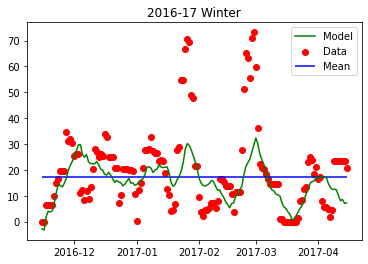

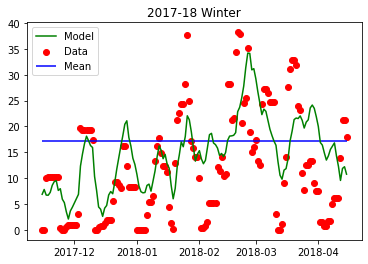

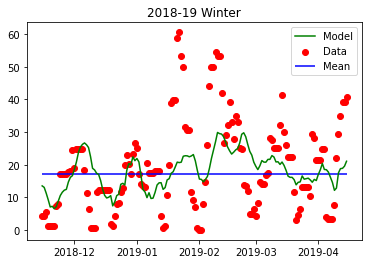

In [14]:
# let's plot the results for 2016-17
plt.plot(dates[0][0]['ds'],dates[0][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[0][1]['ds'],dates[0][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[0][2]['y'][20682], xmin=dates[0][1]['ds'][20531], xmax=dates[0][1]['ds'][20682], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2016-17 Winter')
plt.show()


# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[1][2]['y'][20682], xmin=dates[1][1]['ds'][20895], xmax=dates[1][1]['ds'][21046], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2017-18 Winter')
plt.show()

# let's plot the results for 2018-19
plt.plot(dates[2][0]['ds'],dates[2][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[2][1]['ds'],dates[2][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[2][2]['y'][20682], xmin=dates[2][1]['ds'][21260], xmax=dates[2][1]['ds'][21411], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2018-19 Winter')
plt.savefig('Prophet_reg1.jpg')
plt.show()


That looks better than just using the time series. Let's see what happens if we add some more regressors: lag and square features

## 3. FB Prophet Time Series with regression and more features to regress: lag precipitation, and square of PDO, AMO, and Tmax_avg

In [15]:
# let's add some regressors
# function - takes in dataframe to model and test (November 15 - April 15)


# manual loop for calculating error year by year
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

RMSE_model = 0
RMSE_dum = 0
RMSE_diff = 0

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
    m_fb.add_regressor('TMAX_7avg')
    m_fb.add_regressor('TMIN_7avg')
    m_fb.add_regressor('TOBS_7avg')
    m_fb.add_regressor('PDO')
    m_fb.add_regressor('AMO')
    m_fb.add_regressor('TMAX_7avg_sq')
    m_fb.add_regressor('PRCP_30')
    m_fb.add_regressor('PRCP_60')
    m_fb.add_regressor('PRCP_90')
    m_fb.add_regressor('PRCP_120')
    m_fb.add_regressor('AMO_sq')
    m_fb.add_regressor('PDO-sq')
    m_fb.fit(X7_train)
    # predicts for 1 year based on that model
    future = m_fb.make_future_dataframe(periods=365)
    forecast = m_fb.predict(X7_test)
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])
    
    # sum of the model error
    RMSE_model += RMSE
    
    # sum of the dummy model error
    RMSE_dum += RMSE_mean
    
    # sum of the differences
    RMSE_diff += (RMSE - RMSE_mean)

# print the resulting MSE
print(RMSE7)

[[12.713478081549574, 16.27826291591095, -3.564784834361376], [8.435949603279191, 11.38487691487486, -2.9489273115956696], [12.067941824164933, 14.031903165705913, -1.9639613415409798]]


In [16]:
print("Model:", RMSE_model, "Dummy:", RMSE_dum, "Difference:", RMSE_diff)

Model: 33.2173695089937 Dummy: 41.69504299649172 Difference: -8.477673487498025


In [17]:
33.2173695089937/3

11.0724565029979

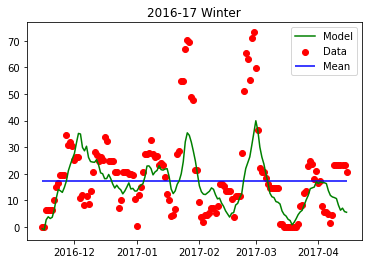

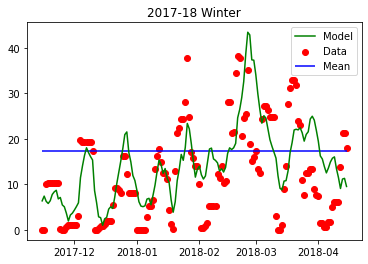

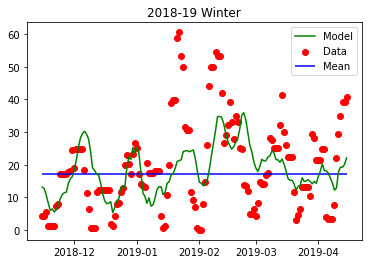

In [18]:
# let's plot the results for 2016-17
plt.plot(dates[0][0]['ds'],dates[0][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[0][1]['ds'],dates[0][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[0][2]['y'][20682], xmin=dates[0][1]['ds'][20531], xmax=dates[0][1]['ds'][20682], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2016-17 Winter')
plt.show()


# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[1][2]['y'][20682], xmin=dates[1][1]['ds'][20895], xmax=dates[1][1]['ds'][21046], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2017-18 Winter')
plt.show()

# let's plot the results for 2018-19
plt.plot(dates[2][0]['ds'],dates[2][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[2][1]['ds'],dates[2][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[2][2]['y'][20682], xmin=dates[2][1]['ds'][21260], xmax=dates[2][1]['ds'][21411], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2018-19 Winter')
plt.savefig('Prophet_reg2.jpg')
plt.show()

This was barely any improvement over the model with just temperature; these additional variables may not add any more value, but let's try to model with just those variables (that can be seen further in advance) and drop the temperature regressors

## 4. FB Prophet Time Series with regressor for just the things that can be modeled far in advance (PDO, AMO, and precip lag)

In [19]:
# function - takes in dataframe to model and test (November 15 - April 15)


# manual loop for calculating error year by year
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

RMSE_model = 0
RMSE_dum = 0
RMSE_diff = 0

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)
    m_fb.add_regressor('PDO')
    m_fb.add_regressor('AMO')
    m_fb.add_regressor('PRCP_30')
    m_fb.add_regressor('PRCP_60')
    m_fb.add_regressor('PRCP_90')
    m_fb.add_regressor('PRCP_120')
    m_fb.add_regressor('AMO_sq')
    m_fb.add_regressor('PDO-sq')
    m_fb.fit(X7_train)
    # predicts for 1 year based on that model
    future = m_fb.make_future_dataframe(periods=365)
    forecast = m_fb.predict(X7_test)
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])
    
    # sum of the model error
    RMSE_model += RMSE
    
    # sum of the dummy model error
    RMSE_dum += RMSE_mean
    
    # sum of the differences
    RMSE_diff += (RMSE - RMSE_mean)

# print the resulting MSE
print(RMSE7)

[[16.450000762785077, 16.27826291591095, 0.17173784687412663], [10.426272239746426, 11.38487691487486, -0.9586046751284343], [14.280858930868462, 14.031903165705913, 0.24895576516254891]]


In [20]:
(RMSE7[0][0] + RMSE7[1][0] + RMSE7[2][1])/3

13.636058722745807

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AMO,AMO_lower,AMO_upper,AMO_sq,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-15,6.358973,-4.873361,25.930908,6.358973,6.358973,-0.447534,-0.447534,-0.447534,0.100216,...,-0.324400,-0.324400,-0.324400,4.832918,4.832918,4.832918,0.0,0.0,0.0,10.867491
1,2018-11-16,6.358446,-2.939465,26.249969,6.358446,6.358446,-0.440362,-0.440362,-0.440362,0.101911,...,-0.338685,-0.338685,-0.338685,5.035430,5.035430,5.035430,0.0,0.0,0.0,11.055190
2,2018-11-17,6.357918,-4.517618,26.860249,6.357918,6.357918,-0.433190,-0.433190,-0.433190,0.103578,...,-0.332234,-0.332234,-0.332234,5.225279,5.225279,5.225279,0.0,0.0,0.0,11.250964
3,2018-11-18,6.357391,-5.075471,26.824461,6.357391,6.357391,-0.426017,-0.426017,-0.426017,0.105218,...,-0.327756,-0.327756,-0.327756,5.404561,5.404561,5.404561,0.0,0.0,0.0,11.434196
4,2018-11-19,6.356864,-3.874838,27.532637,6.356864,6.356864,-0.418845,-0.418845,-0.418845,0.106831,...,-0.313930,-0.313930,-0.313930,5.575450,5.575450,5.575450,0.0,0.0,0.0,11.618385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2019-04-11,6.281482,0.018852,30.763507,6.281482,6.281482,0.412241,0.412241,0.412241,0.110020,...,1.606534,1.606534,1.606534,6.689630,6.689630,6.689630,0.0,0.0,0.0,14.577646
148,2019-04-12,6.280955,-0.881438,29.708868,6.280955,6.280955,0.412469,0.412469,0.412469,0.109971,...,1.604624,1.604624,1.604624,6.212168,6.212168,6.212168,0.0,0.0,0.0,14.097748
149,2019-04-13,6.280428,-2.227127,29.280151,6.280428,6.280428,0.412696,0.412696,0.412696,0.109922,...,1.739183,1.739183,1.739183,5.722495,5.722495,5.722495,0.0,0.0,0.0,13.742107
150,2019-04-14,6.279901,-2.693884,28.627564,6.279901,6.279901,0.412924,0.412924,0.412924,0.109873,...,1.673971,1.673971,1.673971,5.227284,5.227284,5.227284,0.0,0.0,0.0,13.181157


In [22]:
print("Model:", RMSE_model, "Dummy:", RMSE_dum, "Difference:", RMSE_diff)

Model: 41.15713193339997 Dummy: 41.69504299649172 Difference: -0.5379110630917587


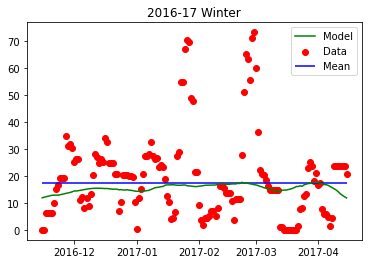

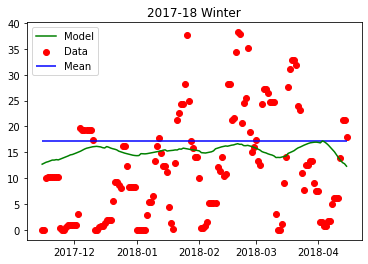

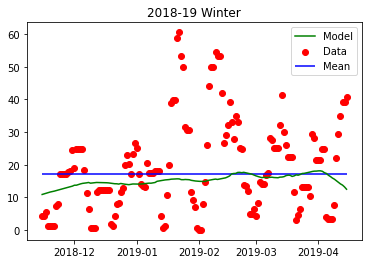

In [23]:
# let's plot the results for 2016-17
plt.plot(dates[0][0]['ds'],dates[0][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[0][1]['ds'],dates[0][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[0][2]['y'][20682], xmin=dates[0][1]['ds'][20531], xmax=dates[0][1]['ds'][20682], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2016-17 Winter')
plt.show()


# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[1][2]['y'][20682], xmin=dates[1][1]['ds'][20895], xmax=dates[1][1]['ds'][21046], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2017-18 Winter')
plt.savefig('Prophet_reg3.jpg')
plt.show()

# let's plot the results for 2018-19
plt.plot(dates[2][0]['ds'],dates[2][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[2][1]['ds'],dates[2][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[2][2]['y'][20682], xmin=dates[2][1]['ds'][21260], xmax=dates[2][1]['ds'][21411], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2018-19 Winter')
plt.show()

The results is not much better than just taking the dummy model of the mean. I wonder if we could run Random Forest on the residuals from the time series? I think that is possible, but requires some extra coding.

## 5. FB Prophet for 7-day snowfall total with regressors using Random Forest Regressor on the residuals (instead of FB's built-in linear regressor)

In [24]:
from sklearn.ensemble import RandomForestRegressor

# manual loop for calculating error year by year
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

RMSE_model = 0
RMSE_dum = 0
RMSE_diff = 0

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)

    m_fb.fit(X7_train)
    # predicts over the training data set
    forecast_train = m_fb.predict(X7_train)
    # compute the residual (from the time series modeling) over the training data set
    residual = X7_train['y'] - forecast_train['yhat']
    
    ## model the Random Forest based on the long-term regressors and the residual
    regr = RandomForestRegressor(max_leaf_nodes=70, random_state=0)
    regr.fit(X7_train.drop(['y', 'ds'], axis=1), residual)
    
    #### now that we have both models: FB Prophet time series + RF Classifier, let's test
    # time series
    forecast_test = m_fb.predict(X7_test)
    # random forest
    forecast_rf = regr.predict(X7_test.drop(['ds', 'y'], axis=1))
    # combine the forecasts
    forecast = forecast_test.copy()
    forecast['yhat'] = forecast['yhat'] + forecast_rf   
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])
    
    # sum of the model error
    RMSE_model += RMSE
    
    # sum of the dummy model error
    RMSE_dum += RMSE_mean
    
    # sum of the differences
    RMSE_diff += (RMSE - RMSE_mean)

# print the resulting MSE
print(RMSE7)

[[12.102069701753422, 16.27826291591095, -4.176193214157529], [9.032427746337614, 11.38487691487486, -2.3524491685372464], [11.202434690263942, 14.031903165705913, -2.8294684754419706]]


In [25]:
print("Model:", RMSE_model, "Dummy:", RMSE_dum, "Difference:", RMSE_diff)

Model: 32.33693213835498 Dummy: 41.69504299649172 Difference: -9.358110858136746


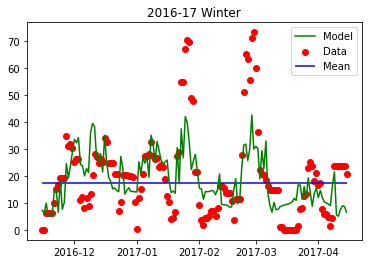

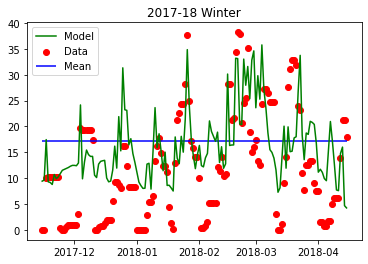

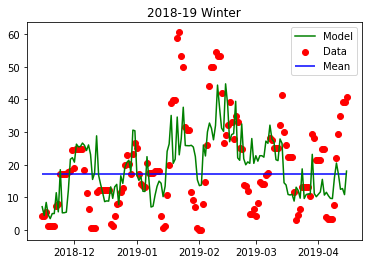

In [26]:
# let's plot the results for 2016-17
plt.plot(dates[0][0]['ds'],dates[0][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[0][1]['ds'],dates[0][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[0][2]['y'][20682], xmin=dates[0][1]['ds'][20531], xmax=dates[0][1]['ds'][20682], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2016-17 Winter')
plt.show()


# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[1][2]['y'][20682], xmin=dates[1][1]['ds'][20895], xmax=dates[1][1]['ds'][21046], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2017-18 Winter')
plt.savefig('Prophet_reg4.jpg')
plt.show()

# let's plot the results for 2018-19
plt.plot(dates[2][0]['ds'],dates[2][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[2][1]['ds'],dates[2][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[2][2]['y'][20682], xmin=dates[2][1]['ds'][21260], xmax=dates[2][1]['ds'][21411], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2018-19 Winter')
plt.show()

That was the best score we've seen yet, but that looks like some crazy overfitting that is going on. I should probably limit the number of leaves on the RF tree and try different versions.

# 6. Loop to model for multiple hyperparameters for the RF Regressor
We are looking for a model that is not overfitting the data. We'll write a loop to make this happen.

### Write a general loop that tries different values for number of leaves and then plots the RMSE that results

We used 70 as the max leaf nodes, but we should really check over a range of values, but I don't want to check all 70.
Instead we are going to randomly select 10 from the range 5 to 70
We'll store the top 3 that have the least RMSE and pick one from that group


In [27]:
# random values to use in the iteration
import random
n_leaves = random.sample(range(5,70), 10)

# variables to keep score
scores = []

for leaf in n_leaves:

    # loop for calculating error year by year
    RMSE7 = []
    dates = []
    X7_dum = pd.DataFrame()

    RMSE_model = 0
    RMSE_dum = 0
    RMSE_diff = 0

    for yr in range(2016,2019):
        # split date between test and train data set
        split_date = str(yr) + '-11-14'
        # end date of the test set at the end of winter
        end_date = str(yr+1) + '-04-15'
        # takes all of the data before the split date
        X7_train = X7[X7['ds'] <= split_date]
        # data set from the split through the next winter
        X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]

        # create dummy model X - just a constant average throughout the season
        X7_dum['ds'] = X7_test['ds']
        X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()

        # model based on the training data set
        m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)

        m_fb.fit(X7_train)
        # predicts over the training data set
        forecast_train = m_fb.predict(X7_train)
        # compute the residual (from the time series modeling) over the training data set
        residual = X7_train['y'] - forecast_train['yhat']

        ## model the Random Forest based on the long-term regressors and the residual
        regr = RandomForestRegressor(max_leaf_nodes=leaf, random_state=0)
        regr.fit(X7_train.drop(['y', 'ds'], axis=1), residual)

        #### now that we have both models: FB Prophet time series + RF Classifier, let's test
        # time series
        forecast_test = m_fb.predict(X7_test)
        # random forest
        forecast_rf = regr.predict(X7_test.drop(['ds', 'y'], axis=1))
        # combine the forecasts
        forecast = forecast_test.copy()
        forecast['yhat'] = forecast['yhat'] + forecast_rf   

        # split out that last winter from the prediction set
        compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
        # calculate the mean squared error
        RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
        #print(yr, compare['yhat'].shape, X7_test['y'].shape)
        #dates.append([compare, X7_test])

        #calculate the RMSE for the dummy model
        RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))

        # append the mean squared error to the list
        RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])

        # sum of the model error
        RMSE_model += RMSE

        # sum of the dummy model error
        RMSE_dum += RMSE_mean

        # sum of the differences
        RMSE_diff += (RMSE - RMSE_mean)

    # print the resulting MSE
    scores.append(RMSE_diff)
    print(leaf, RMSE_diff)

59 -9.321992921297168
66 -9.333360694946585
27 -9.061141553980022
36 -9.19128254074568
50 -9.262212592602578
69 -9.342329258081522
62 -9.329490641659755
49 -9.261238961724114
11 -8.48080108769526
32 -9.170994733135993


39 -9.185934399070401 <br>
24 -8.996266195405111 <br>
11 -8.48080108769526
44 -9.195394635418817
7 -8.095999210014266
64 -9.326012139825865
26 -9.028709155655164
10 -8.389041246775566
23 -8.974287983636987
31 -9.15934744223269

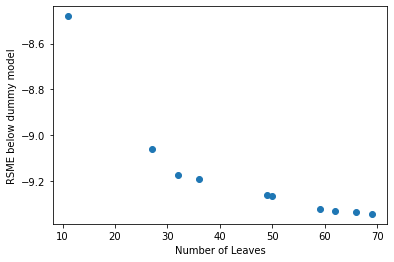

In [28]:
# plot the number of leaves versus the RSME difference
plt.scatter(n_leaves, scores)
plt.xlabel('Number of Leaves')
plt.ylabel('RSME below dummy model')
plt.savefig('Prophet_RF_tune1.jpg')
plt.show()

This is great to see. I think 31 winds up being the "elbow" of this method. Let's use that value and see how things turn out in the model.

# 7. Model with best hyperparameter for the RF Regressor
We take the best hyperparameter from the loop (n_leaves = 31) and use that in the loop

In [29]:
# manual loop for calculating error year by year. Let's use 31 leaves based on the results above
RMSE7 = []
dates = []
X7_dum = pd.DataFrame()

RMSE_model = 0
RMSE_dum = 0
RMSE_diff = 0

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'
    # takes all of the data before the split date
    X7_train = X7[X7['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7[(X7['ds'] <= end_date) & (X7['ds'] > split_date)]
    
    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()
    
    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)

    m_fb.fit(X7_train)
    # predicts over the training data set
    forecast_train = m_fb.predict(X7_train)
    # compute the residual (from the time series modeling) over the training data set
    residual = X7_train['y'] - forecast_train['yhat']
    
    ## model the Random Forest based on the long-term regressors and the residual
    regr = RandomForestRegressor(max_leaf_nodes=39, random_state=0)
    regr.fit(X7_train.drop(['y', 'ds'], axis=1), residual)
    
    #### now that we have both models: FB Prophet time series + RF Classifier, let's test
    # time series
    forecast_test = m_fb.predict(X7_test)
    # random forest
    forecast_rf = regr.predict(X7_test.drop(['ds', 'y'], axis=1))
    # combine the forecasts
    forecast = forecast_test.copy()
    forecast['yhat'] = forecast['yhat'] + forecast_rf   
    
    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test, X7_dum])
    
    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))
    
    # append the mean squared error to the list
    RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])
    
    # sum of the model error
    RMSE_model += RMSE
    
    # sum of the dummy model error
    RMSE_dum += RMSE_mean
    
    # sum of the differences
    RMSE_diff += (RMSE - RMSE_mean)

# print the resulting MSE
print(RMSE7)

[[12.354478092456063, 16.27826291591095, -3.9237848234548878], [8.932903662482463, 11.38487691487486, -2.4519732523923974], [11.221726842482797, 14.031903165705913, -2.810176323223116]]


In [30]:
print("Model:", RMSE_model, "Dummy:", RMSE_dum, "Difference:", RMSE_diff)

Model: 32.509108597421324 Dummy: 41.69504299649172 Difference: -9.185934399070401


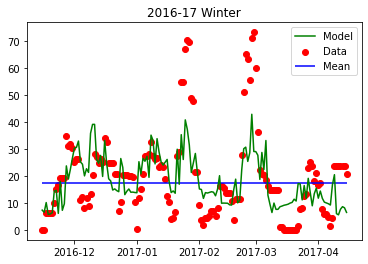

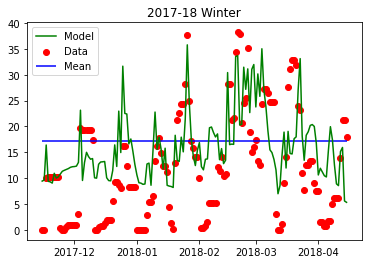

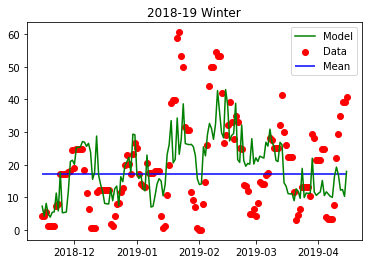

In [31]:
# let's plot the results for 2016-17
plt.plot(dates[0][0]['ds'],dates[0][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[0][1]['ds'],dates[0][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[0][2]['y'][20682], xmin=dates[0][1]['ds'][20531], xmax=dates[0][1]['ds'][20682], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2016-17 Winter')
plt.show()


# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[1][2]['y'][20682], xmin=dates[1][1]['ds'][20895], xmax=dates[1][1]['ds'][21046], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2017-18 Winter')
plt.savefig('Prophet_RF_tune2.jpg')
plt.show()

# let's plot the results for 2018-19
plt.plot(dates[2][0]['ds'],dates[2][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[2][1]['ds'],dates[2][1]['y'], color='red', label='Data') # scatter of the test
plt.hlines(dates[2][2]['y'][20682], xmin=dates[2][1]['ds'][21260], xmax=dates[2][1]['ds'][21411], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2018-19 Winter')
plt.show()

I was excited at first, but that model looks overfit.

In [32]:
X7_train.columns

Index(['ds', 'TMAX_7avg', 'TMIN_7avg', 'TOBS_7avg', 'PDO', 'AMO', 'y', 'PRCP',
       'TMAX_7avg_sq', 'PRCP_30', 'PRCP_60', 'PRCP_90', 'PRCP_120', 'AMO_sq',
       'PDO-sq'],
      dtype='object')

# 7. Loop to model for multiple hyperparameters for the RF Regressor without short-term predictors
We are looking for a model that is not overfitting the data. We'll write a loop to make this happen. <br>
We are removing the temperatures since they can't be predicted further than the weather. <br>

In [33]:
# random values to use in the iteration
import random
random.seed(33)
n_leaves = random.sample(range(5,40), 10)

# variables to keep score
scores = []

for leaf in n_leaves:

    # loop for calculating error year by year
    RMSE7 = []
    dates = []
    X7_dum = pd.DataFrame()

    RMSE_model = 0
    RMSE_dum = 0
    RMSE_diff = 0

    for yr in range(2016,2019):
        # split date between test and train data set
        split_date = str(yr) + '-11-14'
        # end date of the test set at the end of winter
        end_date = str(yr+1) + '-04-15'
        
        # let's drop the temperature features
        X7_lg = X7.drop(['TMAX_7avg', 'TMIN_7avg', 'TOBS_7avg', 'TMAX_7avg_sq', 'PRCP'], axis=1)
        
        # takes all of the data before the split date
        X7_train = X7_lg[X7_lg['ds'] <= split_date]
        # data set from the split through the next winter
        X7_test = X7_lg[(X7_lg['ds'] <= end_date) & (X7['ds'] > split_date)]

        # create dummy model X - just a constant average throughout the season
        X7_dum['ds'] = X7_test['ds']
        X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()

        # model based on the training data set
        m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)

        m_fb.fit(X7_train)
        # predicts over the training data set
        forecast_train = m_fb.predict(X7_train)
        # compute the residual (from the time series modeling) over the training data set
        residual = X7_train['y'] - forecast_train['yhat']

        ## model the Random Forest based on the long-term regressors and the residual
        regr = RandomForestRegressor(max_leaf_nodes=leaf, random_state=0)
        regr.fit(X7_train.drop(['ds', 'y'], axis=1), residual)

        #### now that we have both models: FB Prophet time series + RF Classifier, let's test
        # time series
        forecast_test = m_fb.predict(X7_test)
        # random forest
        forecast_rf = regr.predict(X7_test.drop(['ds', 'y'], axis=1))
        # combine the forecasts
        forecast = forecast_test.copy()
        forecast['yhat'] = forecast['yhat'] + forecast_rf   

        # split out that last winter from the prediction set
        compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
        # calculate the mean squared error
        RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
        #print(yr, compare['yhat'].shape, X7_test['y'].shape)
        #dates.append([compare, X7_test])

        #calculate the RMSE for the dummy model
        RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))

        # append the mean squared error to the list
        RMSE7.append([RMSE, RMSE_mean, RMSE - RMSE_mean])

        # sum of the model error
        RMSE_model += RMSE

        # sum of the dummy model error
        RMSE_dum += RMSE_mean

        # sum of the differences
        RMSE_diff += (RMSE - RMSE_mean)

    # print the resulting MSE
    scores.append(RMSE_diff)
    print(leaf, RMSE_diff)

15 -0.4057038508696902
19 -0.3837617261729136
22 -0.49580870370384567
35 -0.5960672702175884
25 -0.4986859369574077
33 -0.6211280957850214
34 -0.5957102711276061
37 -0.6479507232076216
21 -0.46675633198040245
10 -0.29480346439492955


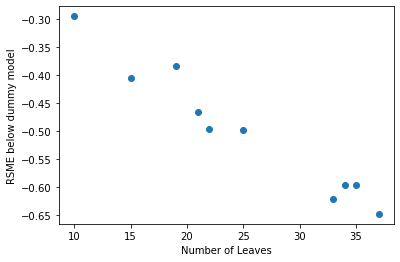

In [34]:
# plot the number of leaves versus the RSME difference
plt.scatter(n_leaves, scores)
plt.xlabel('Number of Leaves')
plt.ylabel('RSME below dummy model')
plt.savefig('Prophet_RF_tune3.jpg')
plt.show()

Let's look at this model versus the actual snowfall for all 3 recent ski season.

In [37]:
# loop for calculating error year by year
RMSE_tuned = []
dates = []
X7_dum = pd.DataFrame()

RMSE_model = 0
RMSE_dum = 0
RMSE_diff = 0

for yr in range(2016,2019):
    # split date between test and train data set
    split_date = str(yr) + '-11-14'
    # end date of the test set at the end of winter
    end_date = str(yr+1) + '-04-15'

    # let's drop the temperature features
    X7_lg = X7.drop(['TMAX_7avg', 'TMIN_7avg', 'TOBS_7avg', 'TMAX_7avg_sq', 'PRCP'], axis=1)

    # takes all of the data before the split date
    X7_train = X7_lg[X7_lg['ds'] <= split_date]
    # data set from the split through the next winter
    X7_test = X7_lg[(X7_lg['ds'] <= end_date) & (X7['ds'] > split_date)]

    # create dummy model X - just a constant average throughout the season
    X7_dum['ds'] = X7_test['ds']
    X7_dum['y'] = X7_train[X7_train['ds'].dt.month.isin(['12','01','02','03','04'])]['y'].mean()

    # model based on the training data set
    m_fb = Prophet(yearly_seasonality = True, daily_seasonality=False, weekly_seasonality=False)

    m_fb.fit(X7_train)
    # predicts over the training data set
    forecast_train = m_fb.predict(X7_train)
    # compute the residual (from the time series modeling) over the training data set
    residual = X7_train['y'] - forecast_train['yhat']

    ## model the Random Forest based on the long-term regressors and the residual
    regr = RandomForestRegressor(max_leaf_nodes=33, random_state=0)
    regr.fit(X7_train.drop(['ds', 'y'], axis=1), residual)

    #### now that we have both models: FB Prophet time series + RF Classifier, let's test
    # time series
    forecast_test = m_fb.predict(X7_test)
    # random forest
    forecast_rf = regr.predict(X7_test.drop(['ds', 'y'], axis=1))
    # combine the forecasts
    forecast = forecast_test.copy()
    forecast['yhat'] = forecast['yhat'] + forecast_rf   

    # split out that last winter from the prediction set
    compare = forecast[(forecast['ds'] <= end_date) & (forecast['ds'] > split_date)]
    # calculate the mean squared error
    RMSE = np.sqrt(mean_squared_error(X7_test['y'],compare['yhat']))
    #print(yr, compare['yhat'].shape, X7_test['y'].shape)
    dates.append([compare, X7_test])

    #calculate the RMSE for the dummy model
    RMSE_mean = np.sqrt(mean_squared_error(X7_test['y'], X7_dum['y']))

    # append the mean squared error to the list
    RMSE_tuned.append([RMSE, RMSE_mean, RMSE - RMSE_mean])

print(RMSE_tuned)

[[15.997840865892709, 16.27826291591095, -0.2804220500182417], [10.394558508363126, 11.38487691487486, -0.9903184065117348], [14.681515526450868, 14.031903165705913, 0.6496123607449551]]


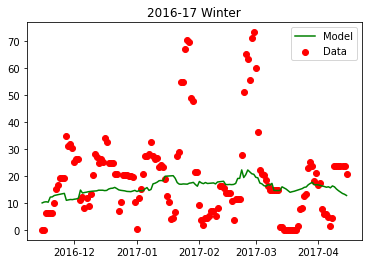

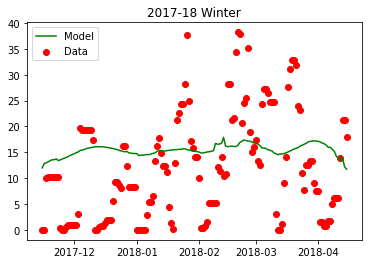

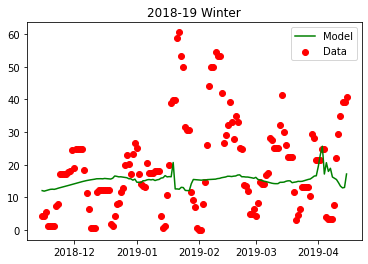

In [40]:
# print the plots from those years of modeling
# let's plot the results for 2016-17
plt.plot(dates[0][0]['ds'],dates[0][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[0][1]['ds'],dates[0][1]['y'], color='red', label='Data') # scatter of the test
#plt.hlines(dates[0][2]['y'][20682], xmin=dates[0][1]['ds'][20531], xmax=dates[0][1]['ds'][20682], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2016-17 Winter')
plt.savefig('Prophet_RF_tune3.jpg')
plt.show()


# let's plot the results for 2017-2018
plt.plot(dates[1][0]['ds'],dates[1][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[1][1]['ds'],dates[1][1]['y'], color='red', label='Data') # scatter of the test
#plt.hlines(dates[1][2]['y'][20682], xmin=dates[1][1]['ds'][20895], xmax=dates[1][1]['ds'][21046], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2017-18 Winter')
plt.savefig('Prophet_RF_tune4.jpg')
plt.show()

# let's plot the results for 2018-19
plt.plot(dates[2][0]['ds'],dates[2][0]['yhat'], color='green', label='Model') # line plot of the model
plt.scatter(dates[2][1]['ds'],dates[2][1]['y'], color='red', label='Data') # scatter of the test
#plt.hlines(dates[2][2]['y'][20682], xmin=dates[2][1]['ds'][21260], xmax=dates[2][1]['ds'][21411], color='blue', label='Mean') # line plot of the dummy model
plt.legend()
plt.title('2018-19 Winter')
plt.savefig('Prophet_RF_tune5.jpg')
plt.show()

# I will leave the Model Analysis here for now. 

Should I save any of them odels?
